In [265]:
import pandas as pd
import numpy as np
from scipy import stats
import datetime as dt
import matplotlib
import matplotlib.pyplot as plt
import os
import io
import geopandas as gpd
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
# suppress warning
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [266]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
# pd.set_option('display.max_rows', None)
pd.set_option('display.width', None)
# display all columns

In [267]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Step 1: get the svi nyc data**

In [268]:
file_path1 = '/content/drive/My Drive/X999/bbl_evictions_311_svi_normal_times_svi_zipcode.csv'
file_path2 = '/content/drive/My Drive/X999/bbl_evictions_311_svi_covid_svi_zipcode.csv'
total_rent_evi = '/content/drive/My Drive/X999/total_rent_evi.csv'

In [269]:
normal = pd.read_csv(file_path1)
covid = pd.read_csv(file_path2)
total_rent_evi = pd.read_csv(total_rent_evi)

In [270]:
total_rent_evi.rename(columns={'Unnamed: 0':'types'}, inplace=True)

In [271]:
total_rent_evi

,types,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95
0,month,2017-01-01,2017-02-01,2017-03-01,2017-04-01,2017-05-01,2017-06-01,2017-07-01,2017-08-01,2017-09-01,2017-10-01,2017-11-01,2017-12-01,2018-01-01,2018-02-01,2018-03-01,2018-04-01,2018-05-01,2018-06-01,2018-07-01,2018-08-01,2018-09-01,2018-10-01,2018-11-01,2018-12-01,2019-01-01,2019-02-01,2019-03-01,2019-04-01,2019-05-01,2019-06-01,2019-07-01,2019-08-01,2019-09-01,2019-10-01,2019-11-01,2019-12-01,2020-01-01,2020-02-01,2020-03-01,2020-04-01,2020-05-01,2020-06-01,2020-07-01,2020-08-01,2020-09-01,2020-10-01,2020-11-01,2020-12-01,2021-01-01,2021-02-01,2021-03-01,2021-04-01,2021-05-01,2021-06-01,2021-07-01,2021-08-01,2021-09-01,2021-10-01,2021-11-01,2021-12-01,2022-01-01,2022-02-01,2022-03-01,2022-04-01,2022-05-01,2022-06-01,2022-07-01,2022-08-01,2022-09-01,2022-10-01,2022-11-01,2022-12-01,2023-01-01,2023-02-01,2023-03-01,2023-04-01,2023-05-01,2023-06-01,2023-07-01,2023-08-01,2023-09-01,2023-10-01,2023-11-01,2023-12-01,2024-01-01,2024-02-01,2024-03-01,2024-04-01,2024-05-01,2024-06-01,2024-07-01,2024-08-01,2024-09-01,2024-10-01,2024-11-01,2024-12-01
1,median_price_man,3299.0,3310.5,3265.0,3349.0,3371.5,3375.0,3350.0,3375.0,3354.0,3344.5,3250.0,3300.0,3323.5,3290.0,3250.0,3290.0,3422.5,3428.0,3425.0,3400.0,3395.0,3395.0,3350.0,3409.0,3395.0,3350.0,3395.0,3453.0,3537.5,3597.5,3595.0,3563.0,3602.0,3600.0,3650.0,3608.5,3650.0,3604.5,3543.0,3475.0,3333.5,3201.5,3150.0,3000.0,2928.0,2897.5,2850.0,2822.0,2849.5,2850.0,2850.0,2945.0,3000.0,3129.0,3387.5,3495.0,3560.0,3675.0,3800.0,3950.0,3995.0,4000.0,4125.0,4247.0,4272.5,4227.5,4350.0,4273.0,4350.0,4264.5,4235.0,4292.5,4300.0,4313.0,4398.0,4456.5,4427.5,4400.0,4447.5,4426.5,4425.0,4375.0,4336.0,4250.0,4277.5,4297.5,4399.0,4495.0,4500.0,4497.5,4487.5,4450.0,4394.5,4375.0,4295.0,4407.5
2,eviction_count_man,254,183,215,211,217,211,206,248,202,242,173,110,222,173,227,225,234,203,201,208,160,179,154,136,208,182,166,223,169,181,146,155,110,160,121,114,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,126,117,123,120,114,207,172,211,184,201,194,113,235,211,158,187,158,165,170,202,175,291,168,167
3,median_price_bk,2295.0,2300.0,2300.0,2300.0,2300.0,2374.5,2450.0,2412.5,2450.5,2400.0,2390.0,2350.0,2300.0,2300.0,2399.5,2437.5,2500.0,2500.0,2567.0,2492.5,2550.0,2400.0,2400.0,2400.0,2250.0,2399.0,2400.0,2422.5,2525.0,2500.0,2500.0,2600.0,2398.0,2544.5,2500.0,2475.0,2525.0,2525.0,2550.0,2539.0,2525.0,2499.5,2499.0,2475.0,2400.0,2300.0,2300.0,2251.0,2250.0,2280.0,2269.0,2300.0,2213.0,2400.0,2425.0,2415.0,2424.5,2450.0,2534.0,2619.5,2533.0,2600.0,2651.0,2825.0,2997.5,2956.5,3200.0,3200.0,3000.0,3000.0,2975.0,2975.5,3000.0,3000.0,3000.0,3072.5,3075.0,3175.0,3100.0,3200.0,3100.0,3150.0,3000.0,3000.0,3000.0,3080.0,3052.5,3200.0,3299.0,3300.0,3315.5,3300.0,3300.0,3250.0,3222.5,3200.0
4,eviction_count_bk,460,343,412,395,386,397,363,423,338,377,371,295,460,341,400,414,425,382,354,398,339,414,314,241,404,314,318,279,374,328,371,315,352,315,241,202,293,232,125,0,0,0,0,0,0,0,1,2,0,0,0,2,3,2,10,3,4,2,9,9,18,39,70,84,93,92,88,125,127,147,192,102,259,167,252,192,261,243,246,280,203,273,282,197,331,263,297,241,381,262,312,322,262,251,230,228
5,median_price_si,1950.0,1900.0,1900.0,1918.0,2000.0,2033.0,1950.0,1950.0,1790.0,1875.0,1900.0,1925.0,1800.0,1842.0,1800.0,1825.0,1829.0,1894.0,1950.0,2000.0,2000.0,1865.0,1959.0,1865.0,1853.0,1850.0,1890.0,1875.0,2050.0,2050.0,2000.0,2045.0,2200.0,2200.0,2200.0,2000.0,1952.0,1998.0,2123.0,1831.0,1833.0,1900.0,1900.0,1850.0,1863.0,1950.0,1995.0,2150.0,1950.0,1900.0,1873.0,2000.0,1950.0,1849.0,1849.0,2000.0,2025.0,2125.0,2000.0,2060.0,2050.0,1932.0,1914.0,1950.0,1950.0,1950.0,2025.0,2100.0,2250.0,2200.0,2100.0,2050.0,2095.0,2175.0,2200.0,2200.0,2000.0,2000.0,1899.0,2000.0,205

In [272]:
man_columns = ['month', 'eviction_count_man']
bk_columns = ['month', 'eviction_count_bk']
queens_columns = ['month', 'eviction_count_queens']
bronx_columns = ['month', 'eviction_count_br']
staten_columns = ['month', 'eviction_count_si']

In [273]:
man_df = total_rent_evi[total_rent_evi['types'].isin(man_columns)]
bk_df = total_rent_evi[total_rent_evi['types'].isin(bk_columns)]
queens_df = total_rent_evi[total_rent_evi['types'].isin(queens_columns)]
bronx_df = total_rent_evi[total_rent_evi['types'].isin(bronx_columns)]
staten_df = total_rent_evi[total_rent_evi['types'].isin(staten_columns)]

In [274]:
man_df = man_df.T
man_df = man_df.reset_index()
man_df.columns = man_df.iloc[0]
man_df.drop(columns=['types'], inplace=True)
man_df.drop(index=0, inplace=True)

In [275]:
man_df

,month,eviction_count_man
1,2017-01-01,254
2,2017-02-01,183
3,2017-03-01,215
4,2017-04-01,211
5,2017-05-01,217
...,...,...
92,2024-08-01,202
93,2024-09-01,175
94,2024-10-01,291
95,2024-11-01,168


In [276]:
man_df['month'] = pd.to_datetime(man_df['month'])
man_df['eviction_count_man'] = man_df['eviction_count_man'].astype(int)

In [277]:
man_df['monthly_change'] = man_df['eviction_count_man'].diff()

In [278]:
man_df

,month,eviction_count_man,monthly_change
1,2017-01-01,254,NaN
2,2017-02-01,183,-71.0
3,2017-03-01,215,32.0
4,2017-04-01,211,-4.0
5,2017-05-01,217,6.0
...,...,...,...
92,2024-08-01,202,32.0
93,2024-09-01,175,-27.0
94,2024-10-01,291,116.0
95,2024-11-01,168,-123.0


In [279]:
man_df['monthly_change'] = man_df['monthly_change'].fillna(0)

In [280]:
man_df['monthly_change_pct'] = man_df['monthly_change'] / man_df['eviction_count_man']*100
man_df.fillna(0, inplace=True)
man_df

,month,eviction_count_man,monthly_change,monthly_change_pct
1,2017-01-01,254,0.0,0.000000
2,2017-02-01,183,-71.0,-38.797814
3,2017-03-01,215,32.0,14.883721
4,2017-04-01,211,-4.0,-1.895735
5,2017-05-01,217,6.0,2.764977
...,...,...,...,...
92,2024-08-01,202,32.0,15.841584
93,2024-09-01,175,-27.0,-15.428571
94,2024-10-01,291,116.0,39.862543
95,2024-11-01,168,-123.0,-73.214286


In [281]:
man_df['deseasonalized'] = man_df['eviction_count_man'] - decomposition.seasonal

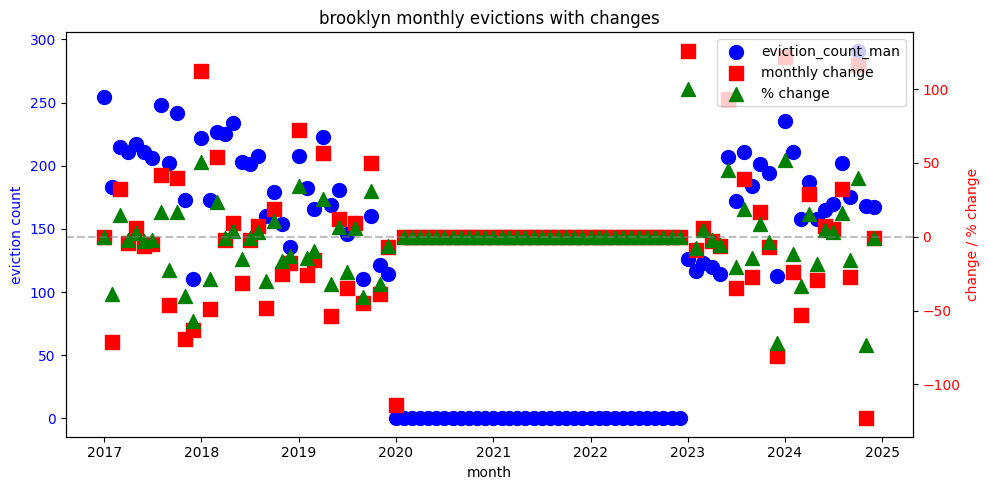

In [284]:
fig, ax1 = plt.subplots(figsize=(10, 5))

ax1.scatter(man_df['month'], man_df['eviction_count_man'], color='blue', label='eviction_count_man', s=100)
ax1.set_xlabel('month')
ax1.set_ylabel('eviction count', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

ax2 = ax1.twinx()
ax2.scatter(man_df['month'], man_df['monthly_change'], color='red', marker='s', label='monthly change', s=100)
ax2.scatter(man_df['month'], man_df['monthly_change_pct'], color='green', marker='^', label='% change', s=100)
ax2.set_ylabel('change / % change', color='red')
ax2.tick_params(axis='y', labelcolor='red')

ax2.axhline(0, color='gray', linestyle='--', alpha=0.5)

plt.title('brooklyn monthly evictions with changes')
fig.legend(loc='upper right', bbox_to_anchor=(1,1), bbox_transform=ax1.transAxes)

plt.xticks(rotation=45)

plt.tight_layout()
plt.show()
# will probably need to use the data to vis in excel

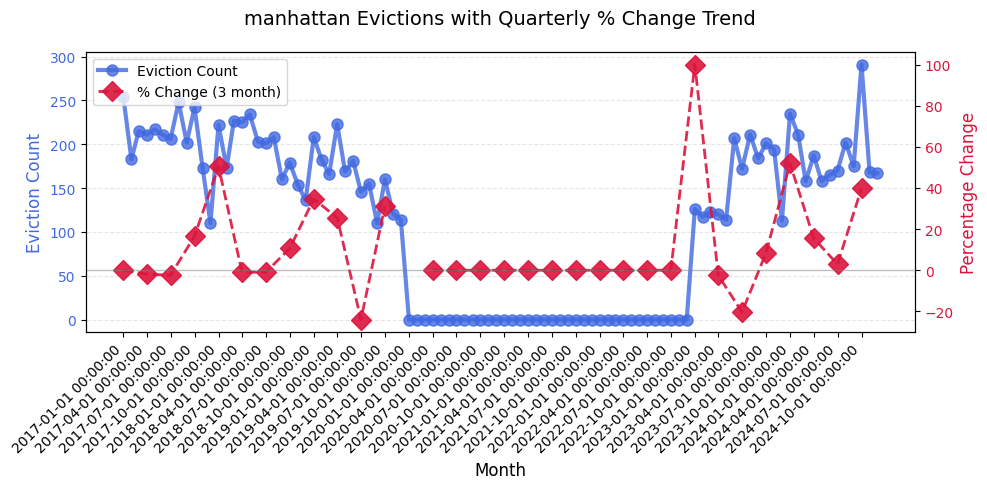

In [285]:
fig, ax1 = plt.subplots(figsize=(10, 5))
line1 = ax1.plot(man_df['month'], man_df['eviction_count_man'],
                color='royalblue', marker='o', linestyle='-',
                linewidth=3, markersize=8, alpha=0.8,
                label='Eviction Count')

ax1.set_xlabel('Month', fontsize=12)
ax1.set_ylabel('Eviction Count', color='royalblue', fontsize=12)
ax1.tick_params(axis='y', labelcolor='royalblue')

ax2 = ax1.twinx()

pct_df = man_df.iloc[::3]

line2 = ax2.plot(pct_df['month'], pct_df['monthly_change_pct'],
                color='crimson', marker='D', linestyle='--',
                linewidth=2, markersize=10, alpha=0.9,
                label='% Change (3 month)')

ax2.set_ylabel('Percentage Change', color='crimson', fontsize=12)
ax2.tick_params(axis='y', labelcolor='crimson')

ax2.axhline(0, color='gray', linestyle='-', alpha=0.5, linewidth=1)
ax1.grid(axis='y', linestyle='--', alpha=0.3)

ax1.set_xticks(pct_df['month'])
ax1.set_xticklabels(pct_df['month'], rotation=45, ha='right')

lines = line1 + line2
labels = [l.get_label() for l in lines]
ax1.legend(lines, labels, loc='upper left', fontsize=10)

plt.title('manhattan Evictions with Quarterly % Change Trend',
          fontsize=14, pad=20)
plt.tight_layout()
plt.show()
# at first glance, evictions go down every summer, around July 1st

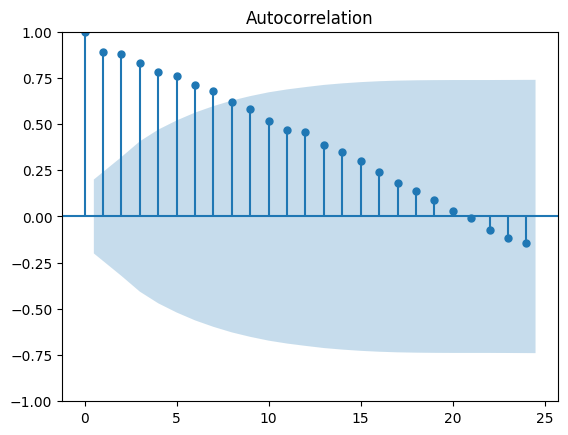

In [286]:
plot_acf(man_df['eviction_count_man'], lags=24, alpha=0.05)
plt.show()
# strong seasonality, every 12 months; decaying correlations
# possible mid-year anti-correlation due to negative values.

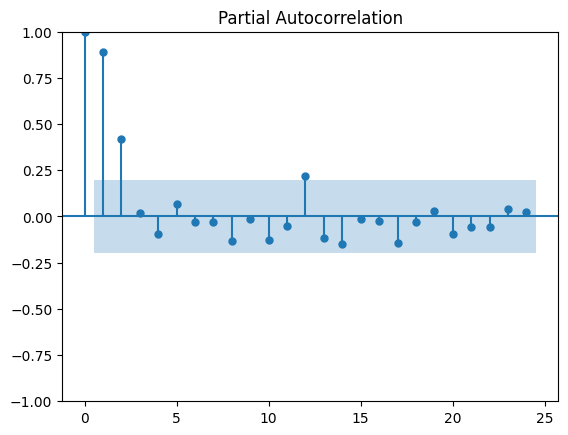

In [287]:
plot_pacf(man_df['eviction_count_man'], lags=24, alpha=0.05)
plt.show()

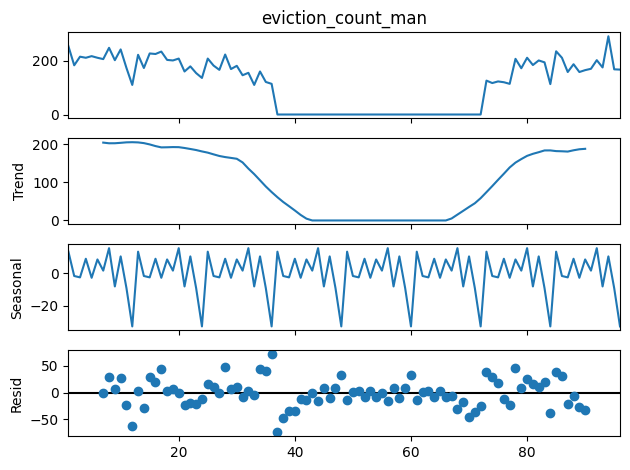

In [288]:
decomposition = seasonal_decompose(man_df['eviction_count_man'], model='additive', period=12)
# decomposition.plot()
_ = decomposition.plot()
# nonlinear trend
# clear 12-month cycle
# peaks in summer (june, july, aug), lows in winter (12, 1, 2)

# **Brooklyn**

In [291]:
bk_df = bk_df.T
bk_df = bk_df.reset_index()
bk_df.columns = bk_df.iloc[0]
bk_df.drop(columns=['types'], inplace=True)

In [292]:
bk_df = bk_df.iloc[1:]

In [293]:
bk_df

,month,eviction_count_bk
1,2017-01-01,460
2,2017-02-01,343
3,2017-03-01,412
4,2017-04-01,395
5,2017-05-01,386
...,...,...
92,2024-08-01,322
93,2024-09-01,262
94,2024-10-01,251
95,2024-11-01,230


In [294]:
bk_df['month'] = pd.to_datetime(bk_df['month'])
bk_df['eviction_count_bk'] = bk_df['eviction_count_bk'].astype(int)

In [295]:
bk_df['monthly_change'] = bk_df['eviction_count_bk'].diff()

In [296]:
bk_df

,month,eviction_count_bk,monthly_change
1,2017-01-01,460,NaN
2,2017-02-01,343,-117.0
3,2017-03-01,412,69.0
4,2017-04-01,395,-17.0
5,2017-05-01,386,-9.0
...,...,...,...
92,2024-08-01,322,10.0
93,2024-09-01,262,-60.0
94,2024-10-01,251,-11.0
95,2024-11-01,230,-21.0


In [297]:
bk_df['monthly_change'] = bk_df['monthly_change'].fillna(0)

In [298]:
bk_df['deseasonalized'] = bk_df['eviction_count_bk'].diff(12)

In [300]:
bk_df['monthly_change_pct'] = bk_df['monthly_change'] / bk_df['eviction_count_bk']*100
bk_df.fillna(0, inplace=True)
bk_df

,month,eviction_count_bk,monthly_change,deseasonalized,monthly_change_pct
1,2017-01-01,460,0.0,0.0,0.000000
2,2017-02-01,343,-117.0,0.0,-34.110787
3,2017-03-01,412,69.0,0.0,16.747573
4,2017-04-01,395,-17.0,0.0,-4.303797
5,2017-05-01,386,-9.0,0.0,-2.331606
...,...,...,...,...,...
92,2024-08-01,322,10.0,42.0,3.105590
93,2024-09-01,262,-60.0,59.0,-22.900763
94,2024-10-01,251,-11.0,-22.0,-4.382470
95,2024-11-01,230,-21.0,-52.0,-9.130435


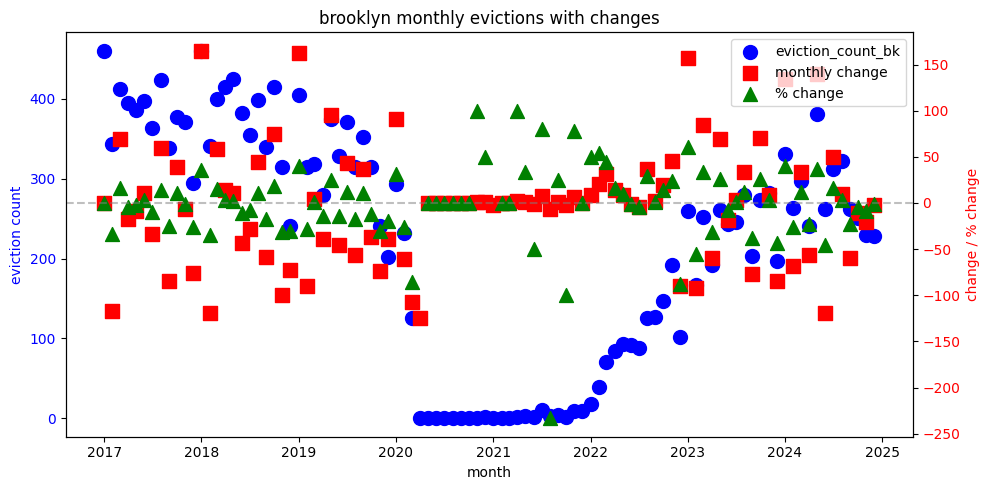

In [351]:
fig, ax1 = plt.subplots(figsize=(10, 5))
ax1.scatter(bk_df['month'], bk_df['eviction_count_bk'], color='blue', label='eviction_count_bk', s=100)
ax1.set_xlabel('month')
ax1.set_ylabel('eviction count', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

ax2 = ax1.twinx()
ax2.scatter(bk_df['month'], bk_df['monthly_change'], color='red', marker='s', label='monthly change', s=100)
ax2.scatter(bk_df['month'], bk_df['monthly_change_pct'], color='green', marker='^', label='% change', s=100)
ax2.set_ylabel('change / % change', color='red')
ax2.tick_params(axis='y', labelcolor='red')

ax2.axhline(0, color='gray', linestyle='--', alpha=0.5)

plt.title('brooklyn monthly evictions with changes')
fig.legend(loc='upper right', bbox_to_anchor=(1,1), bbox_transform=ax1.transAxes)

plt.xticks(rotation=45)

plt.tight_layout()
plt.show()
# will probably need to use the data to vis in excel

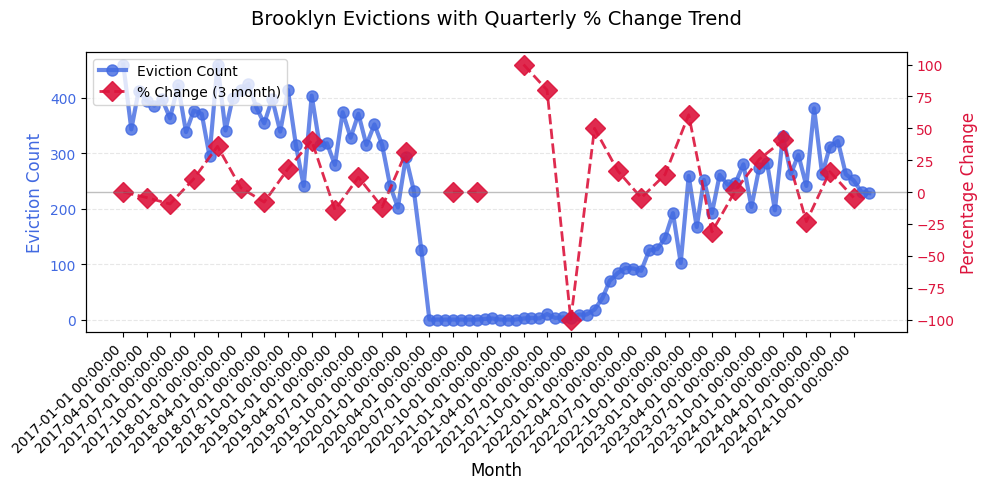

In [302]:
fig, ax1 = plt.subplots(figsize=(10, 5))
line1 = ax1.plot(bk_df['month'], bk_df['eviction_count_bk'],
                color='royalblue', marker='o', linestyle='-',
                linewidth=3, markersize=8, alpha=0.8,
                label='Eviction Count')

ax1.set_xlabel('Month', fontsize=12)
ax1.set_ylabel('Eviction Count', color='royalblue', fontsize=12)
ax1.tick_params(axis='y', labelcolor='royalblue')

ax2 = ax1.twinx()

pct_df = bk_df.iloc[::3]

line2 = ax2.plot(pct_df['month'], pct_df['monthly_change_pct'],
                color='crimson', marker='D', linestyle='--',
                linewidth=2, markersize=10, alpha=0.9,
                label='% Change (3 month)')

ax2.set_ylabel('Percentage Change', color='crimson', fontsize=12)
ax2.tick_params(axis='y', labelcolor='crimson')

ax2.axhline(0, color='gray', linestyle='-', alpha=0.5, linewidth=1)
ax1.grid(axis='y', linestyle='--', alpha=0.3)

ax1.set_xticks(pct_df['month'])
ax1.set_xticklabels(pct_df['month'], rotation=45, ha='right')

lines = line1 + line2
labels = [l.get_label() for l in lines]
ax1.legend(lines, labels, loc='upper left', fontsize=10)

plt.title('Brooklyn Evictions with Quarterly % Change Trend',
          fontsize=14, pad=20)
plt.tight_layout()
plt.show()
# at first glance, evictions go down every summer, around July 1st

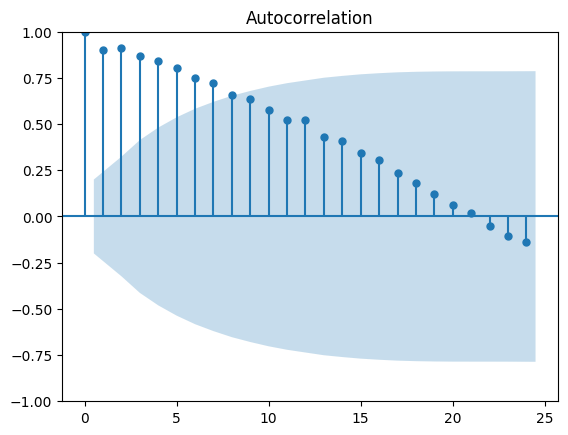

In [303]:
plot_acf(bk_df['eviction_count_bk'], lags=24, alpha=0.05)
plt.show()

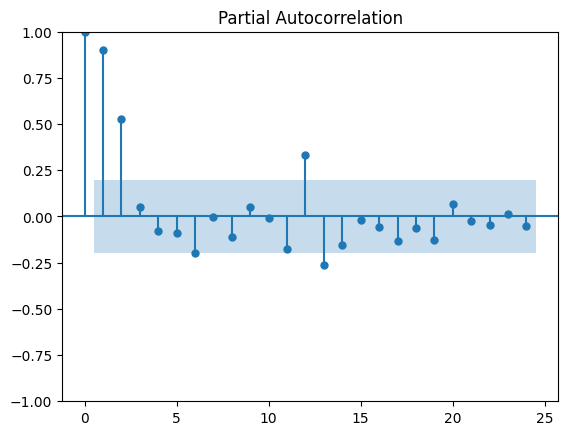

In [304]:
plot_pacf(bk_df['eviction_count_bk'], lags=24, alpha=0.05)
plt.show()

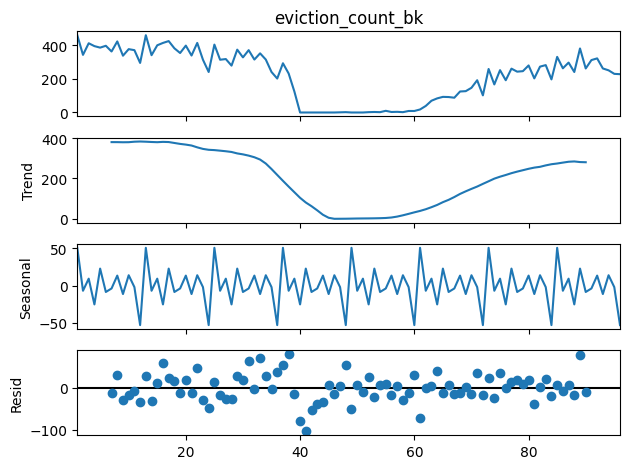

In [305]:
decomposition = seasonal_decompose(bk_df['eviction_count_bk'], model='additive', period=12)
# decomposition.plot()
_ = decomposition.plot()
# nonlinear trend
# more volatile fluctuations than manhattan
# there is a recent dip
# amplitude of ~100, stronger than manhattan (+/-50), meaning more pronounced seasonality
# peaks and lows: likely aligned with academic cycles (student housing turnover, may and september) or extreme weather.
# larger noise

# **Queens**

In [306]:
queens_df = queens_df.T
queens_df = queens_df.reset_index()
queens_df.columns = queens_df.iloc[0]
queens_df.drop(columns=['types'], inplace=True)

In [307]:
queens_df = queens_df.iloc[1:]

In [308]:
queens_df

,month,eviction_count_queens
1,2017-01-01,225
2,2017-02-01,166
3,2017-03-01,209
4,2017-04-01,186
5,2017-05-01,210
...,...,...
92,2024-08-01,168
93,2024-09-01,141
94,2024-10-01,188
95,2024-11-01,127


In [309]:
queens_df['month'] = pd.to_datetime(queens_df['month'])
queens_df['eviction_count_queens'] = queens_df['eviction_count_queens'].astype(int)

In [310]:
queens_df['monthly_change'] = queens_df['eviction_count_queens'].diff()

In [311]:
queens_df

,month,eviction_count_queens,monthly_change
1,2017-01-01,225,NaN
2,2017-02-01,166,-59.0
3,2017-03-01,209,43.0
4,2017-04-01,186,-23.0
5,2017-05-01,210,24.0
...,...,...,...
92,2024-08-01,168,-63.0
93,2024-09-01,141,-27.0
94,2024-10-01,188,47.0
95,2024-11-01,127,-61.0


In [312]:
queens_df['monthly_change'] = queens_df['monthly_change'].fillna(0)

In [313]:
queens_df['deseasonalized'] = queens_df['eviction_count_queens'].diff(12)

In [315]:
queens_df['monthly_change_pct'] = queens_df['monthly_change'] / queens_df['eviction_count_queens']*100
queens_df.fillna(0, inplace=True)
queens_df

,month,eviction_count_queens,monthly_change,deseasonalized,monthly_change_pct
1,2017-01-01,225,0.0,0.0,0.000000
2,2017-02-01,166,-59.0,0.0,-35.542169
3,2017-03-01,209,43.0,0.0,20.574163
4,2017-04-01,186,-23.0,0.0,-12.365591
5,2017-05-01,210,24.0,0.0,11.428571
...,...,...,...,...,...
92,2024-08-01,168,-63.0,42.0,-37.500000
93,2024-09-01,141,-27.0,38.0,-19.148936
94,2024-10-01,188,47.0,97.0,25.000000
95,2024-11-01,127,-61.0,-5.0,-48.031496


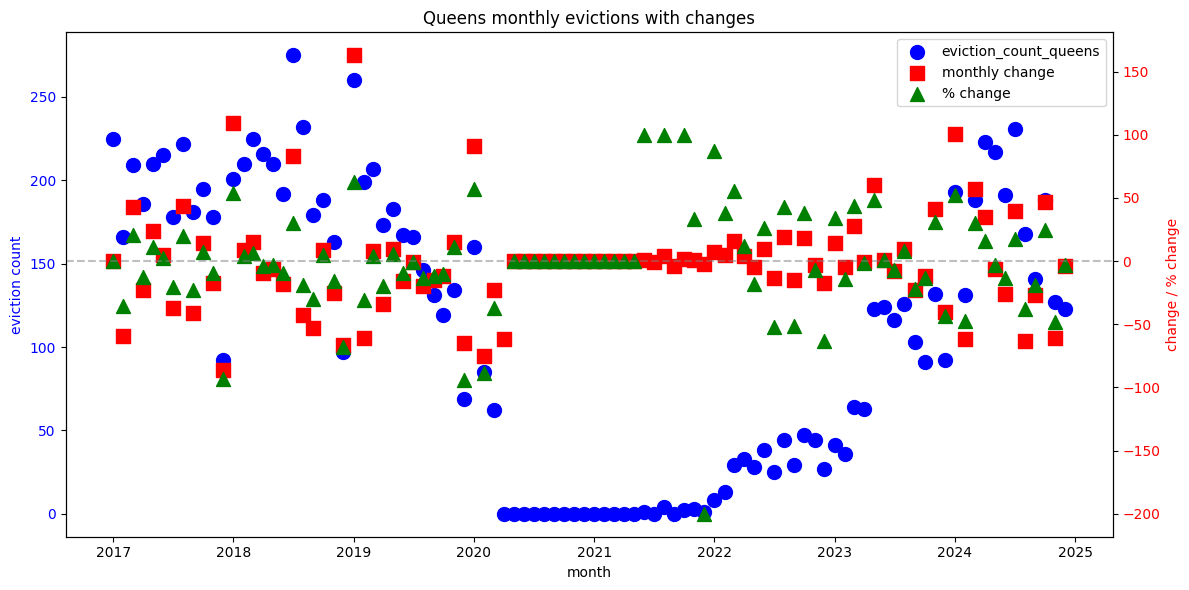

In [316]:
fig, ax1 = plt.subplots(figsize=(12, 6))

ax1.scatter(queens_df['month'], queens_df['eviction_count_queens'], color='blue', label='eviction_count_queens', s=100)
ax1.set_xlabel('month')
ax1.set_ylabel('eviction count', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

ax2 = ax1.twinx()
ax2.scatter(queens_df['month'], queens_df['monthly_change'], color='red', marker='s', label='monthly change', s=100)
ax2.scatter(queens_df['month'], queens_df['monthly_change_pct'], color='green', marker='^', label='% change', s=100)
ax2.set_ylabel('change / % change', color='red')
ax2.tick_params(axis='y', labelcolor='red')

ax2.axhline(0, color='gray', linestyle='--', alpha=0.5)

plt.title('Queens monthly evictions with changes')
fig.legend(loc='upper right', bbox_to_anchor=(1,1), bbox_transform=ax1.transAxes)

plt.xticks(rotation=45)

plt.tight_layout()
plt.show()
# will probably need to use the data to vis in excel

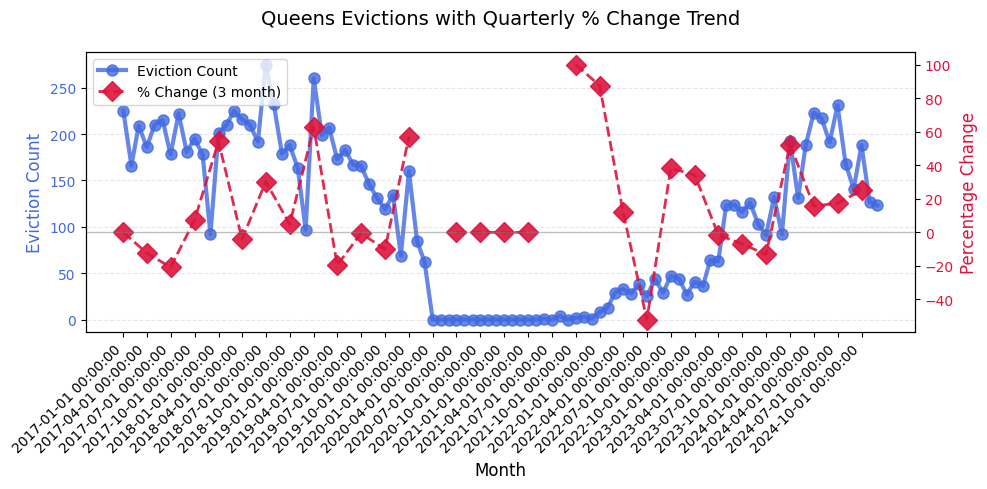

In [317]:
fig, ax1 = plt.subplots(figsize=(10, 5))
line1 = ax1.plot(queens_df['month'], queens_df['eviction_count_queens'],
                color='royalblue', marker='o', linestyle='-',
                linewidth=3, markersize=8, alpha=0.8,
                label='Eviction Count')

ax1.set_xlabel('Month', fontsize=12)
ax1.set_ylabel('Eviction Count', color='royalblue', fontsize=12)
ax1.tick_params(axis='y', labelcolor='royalblue')

ax2 = ax1.twinx()

pct_df = queens_df.iloc[::3]

line2 = ax2.plot(pct_df['month'], pct_df['monthly_change_pct'],
                color='crimson', marker='D', linestyle='--',
                linewidth=2, markersize=10, alpha=0.9,
                label='% Change (3 month)')

ax2.set_ylabel('Percentage Change', color='crimson', fontsize=12)
ax2.tick_params(axis='y', labelcolor='crimson')

ax2.axhline(0, color='gray', linestyle='-', alpha=0.5, linewidth=1)
ax1.grid(axis='y', linestyle='--', alpha=0.3)

ax1.set_xticks(pct_df['month'])
ax1.set_xticklabels(pct_df['month'], rotation=45, ha='right')

lines = line1 + line2
labels = [l.get_label() for l in lines]
ax1.legend(lines, labels, loc='upper left', fontsize=10)

plt.title('Queens Evictions with Quarterly % Change Trend',
          fontsize=14, pad=20)
plt.tight_layout()
plt.show()
# at first glance, evictions go down every summer, around July 1st

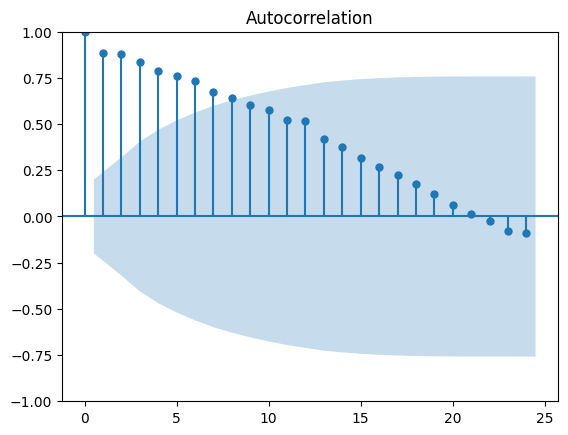

In [318]:
plot_acf(queens_df['eviction_count_queens'], lags=24, alpha=0.05)
plt.show()

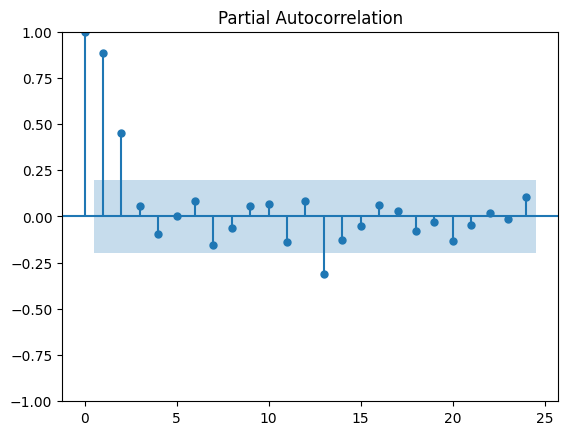

In [319]:
plot_pacf(queens_df['eviction_count_queens'], lags=24, alpha=0.05)
plt.show()

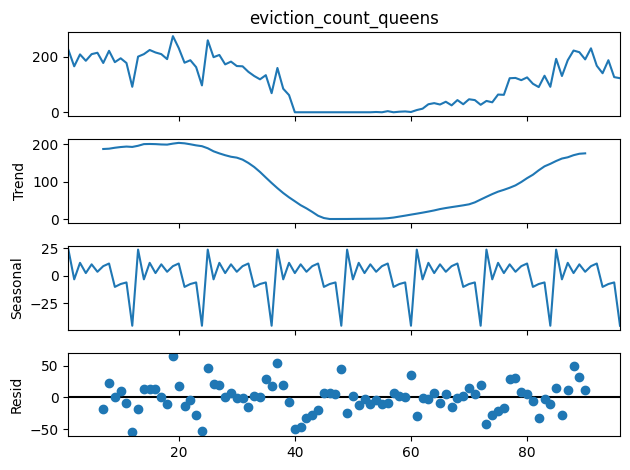

In [320]:
decomposition = seasonal_decompose(queens_df['eviction_count_queens'], model='additive', period=12)
# decomposition.plot()
_ = decomposition.plot()
# nonlinear trend
# more volatile fluctuations than manhattan but less than brooklyn
# there is a recent dip
# amplitude of ~60, stronger than manhattan (+/-50), meaning more pronounced seasonality
# peaks and lows: likely aligned with academic cycles (student housing turnover, may and september) or extreme weather.
# larger noise
# lows at Lags 6–8 (winter) and peaks at lags 12/1 (year-end/new year) suggest winter slowdown (courts or landlords less active).
# or lease cycles (year-end lease expirations)

# **Bronx**

In [321]:
br_df = bronx_df.T
br_df = br_df.reset_index()
br_df.columns = br_df.iloc[0]
br_df.drop(columns=['types'], inplace=True)

In [322]:
br_df = br_df.iloc[1:]

In [323]:
br_df

,month,eviction_count_br
1,2017-01-01,627
2,2017-02-01,451
3,2017-03-01,536
4,2017-04-01,486
5,2017-05-01,610
...,...,...
92,2024-08-01,399
93,2024-09-01,467
94,2024-10-01,464
95,2024-11-01,379


In [324]:
br_df['month'] = pd.to_datetime(br_df['month'])
br_df['eviction_count_br'] = br_df['eviction_count_br'].astype(int)

In [325]:
br_df['monthly_change'] = br_df['eviction_count_br'].diff()

In [326]:
br_df

,month,eviction_count_br,monthly_change
1,2017-01-01,627,NaN
2,2017-02-01,451,-176.0
3,2017-03-01,536,85.0
4,2017-04-01,486,-50.0
5,2017-05-01,610,124.0
...,...,...,...
92,2024-08-01,399,40.0
93,2024-09-01,467,68.0
94,2024-10-01,464,-3.0
95,2024-11-01,379,-85.0


In [327]:
br_df['monthly_change'] = br_df['monthly_change'].fillna(0)

In [328]:
br_df['deseasonalized'] = br_df['eviction_count_br'].diff(12)

In [330]:
br_df['monthly_change_pct'] = br_df['monthly_change'] / br_df['eviction_count_br']*100
br_df.fillna(0, inplace=True)
br_df

,month,eviction_count_br,monthly_change,deseasonalized,monthly_change_pct
1,2017-01-01,627,0.0,0.0,0.000000
2,2017-02-01,451,-176.0,0.0,-39.024390
3,2017-03-01,536,85.0,0.0,15.858209
4,2017-04-01,486,-50.0,0.0,-10.288066
5,2017-05-01,610,124.0,0.0,20.327869
...,...,...,...,...,...
92,2024-08-01,399,40.0,-25.0,10.025063
93,2024-09-01,467,68.0,67.0,14.561028
94,2024-10-01,464,-3.0,-1.0,-0.646552
95,2024-11-01,379,-85.0,69.0,-22.427441


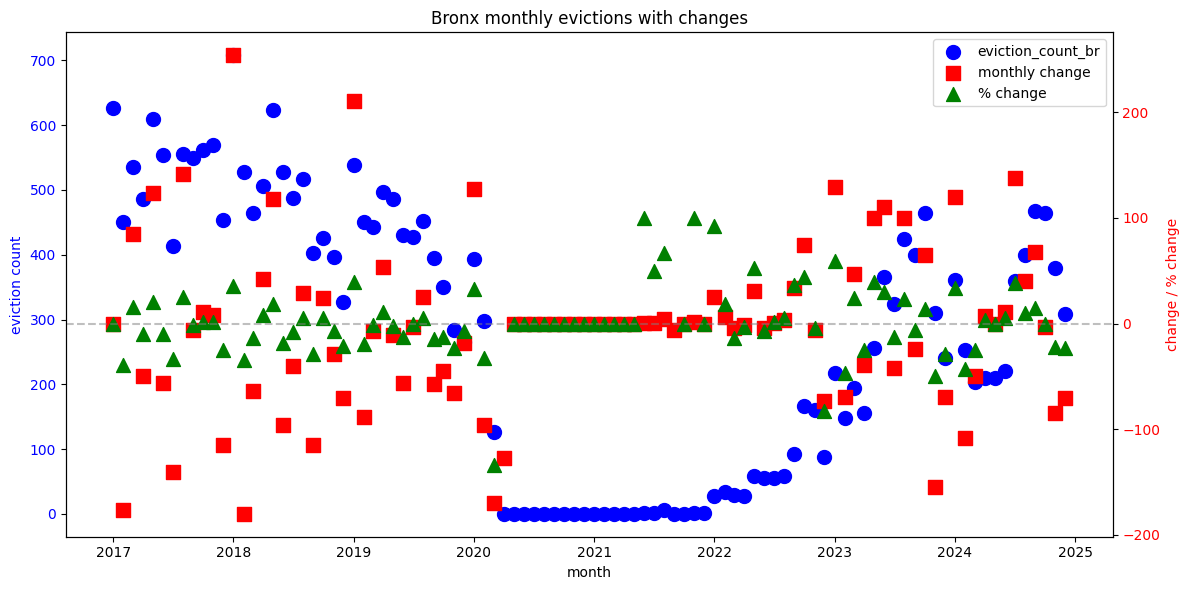

In [331]:
fig, ax1 = plt.subplots(figsize=(12, 6))

ax1.scatter(br_df['month'], br_df['eviction_count_br'], color='blue', label='eviction_count_br', s=100)
ax1.set_xlabel('month')
ax1.set_ylabel('eviction count', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

ax2 = ax1.twinx()
ax2.scatter(br_df['month'], br_df['monthly_change'], color='red', marker='s', label='monthly change', s=100)
ax2.scatter(br_df['month'], br_df['monthly_change_pct'], color='green', marker='^', label='% change', s=100)
ax2.set_ylabel('change / % change', color='red')
ax2.tick_params(axis='y', labelcolor='red')

ax2.axhline(0, color='gray', linestyle='--', alpha=0.5)

plt.title('Bronx monthly evictions with changes')
fig.legend(loc='upper right', bbox_to_anchor=(1,1), bbox_transform=ax1.transAxes)

plt.xticks(rotation=45)

plt.tight_layout()
plt.show()
# will probably need to use the data to vis in excel

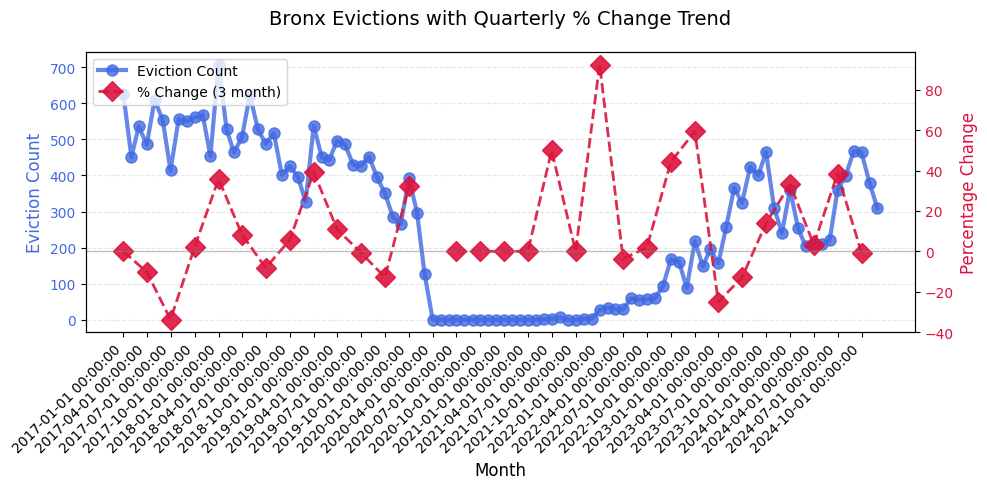

In [332]:
fig, ax1 = plt.subplots(figsize=(10, 5))
line1 = ax1.plot(br_df['month'], br_df['eviction_count_br'],
                color='royalblue', marker='o', linestyle='-',
                linewidth=3, markersize=8, alpha=0.8,
                label='Eviction Count')

ax1.set_xlabel('Month', fontsize=12)
ax1.set_ylabel('Eviction Count', color='royalblue', fontsize=12)
ax1.tick_params(axis='y', labelcolor='royalblue')

ax2 = ax1.twinx()

pct_df = br_df.iloc[::3]

line2 = ax2.plot(pct_df['month'], pct_df['monthly_change_pct'],
                color='crimson', marker='D', linestyle='--',
                linewidth=2, markersize=10, alpha=0.9,
                label='% Change (3 month)')

ax2.set_ylabel('Percentage Change', color='crimson', fontsize=12)
ax2.tick_params(axis='y', labelcolor='crimson')

ax2.axhline(0, color='gray', linestyle='-', alpha=0.5, linewidth=1)
ax1.grid(axis='y', linestyle='--', alpha=0.3)

ax1.set_xticks(pct_df['month'])
ax1.set_xticklabels(pct_df['month'], rotation=45, ha='right')

lines = line1 + line2
labels = [l.get_label() for l in lines]
ax1.legend(lines, labels, loc='upper left', fontsize=10)

plt.title('Bronx Evictions with Quarterly % Change Trend',
          fontsize=14, pad=20)
plt.tight_layout()
plt.show()
# at first glance, evictions go down every summer, around July 1st

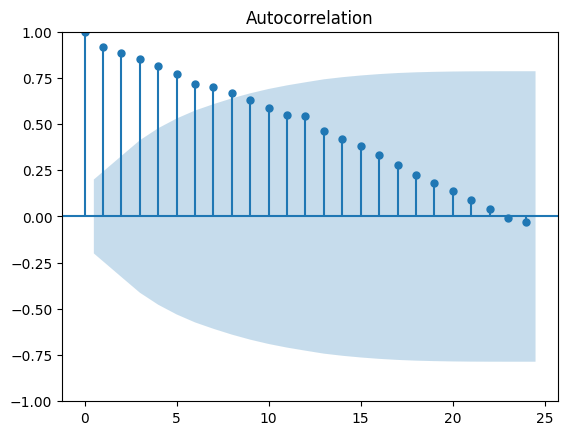

In [333]:
plot_acf(br_df['eviction_count_br'], lags=24, alpha=0.05)
plt.show()

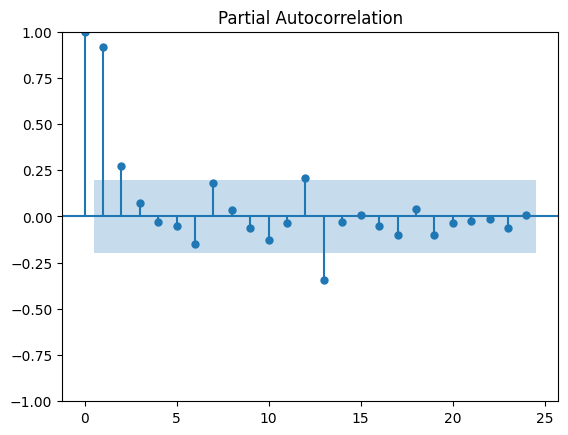

In [334]:
plot_pacf(br_df['eviction_count_br'], lags=24, alpha=0.05)
plt.show()

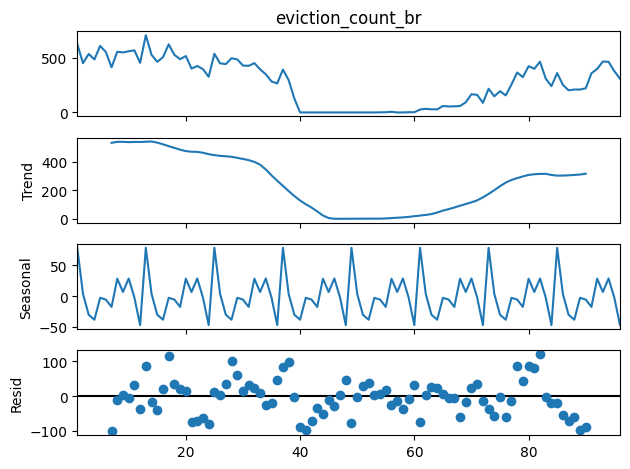

In [335]:
decomposition = seasonal_decompose(br_df['eviction_count_br'], model='additive', period=12)
# decomposition.plot()
_ = decomposition.plot()
# more volatile fluctuations than brooklyn
# less obvious but still clear yearly seasonality
# amplitude of ~50, less than manhattan (+/-50), meaning less pronounced seasonality
# peaks and lows: likely aligned with academic cycles (student housing turnover, may and september) or extreme weather.
# less noise, or model fits well
# winter dips (court closures/holidays), summer peaks (housing turnover).

# **Staten Island**

In [336]:
si_df = staten_df.T
si_df = si_df.reset_index()
si_df.columns = si_df.iloc[0]
si_df.drop(columns=['types'], inplace=True)

In [337]:
si_df = si_df.iloc[1:]

In [338]:
si_df

,month,eviction_count_si
1,2017-01-01,31
2,2017-02-01,30
3,2017-03-01,34
4,2017-04-01,33
5,2017-05-01,42
...,...,...
92,2024-08-01,33
93,2024-09-01,31
94,2024-10-01,42
95,2024-11-01,22


In [339]:
si_df['month'] = pd.to_datetime(si_df['month'])
si_df['eviction_count_si'] = si_df['eviction_count_si'].astype(int)

In [340]:
si_df['monthly_change'] = si_df['eviction_count_si'].diff()

In [341]:
si_df

,month,eviction_count_si,monthly_change
1,2017-01-01,31,NaN
2,2017-02-01,30,-1.0
3,2017-03-01,34,4.0
4,2017-04-01,33,-1.0
5,2017-05-01,42,9.0
...,...,...,...
92,2024-08-01,33,5.0
93,2024-09-01,31,-2.0
94,2024-10-01,42,11.0
95,2024-11-01,22,-20.0


In [342]:
si_df['monthly_change'] = si_df['monthly_change'].fillna(0)

In [343]:
si_df['deseasonalized'] = si_df['eviction_count_si'].diff(12)

In [345]:
si_df['monthly_change_pct'] = si_df['monthly_change'] / si_df['eviction_count_si']*100
si_df.fillna(0, inplace=True)
si_df

,month,eviction_count_si,monthly_change,deseasonalized,monthly_change_pct
1,2017-01-01,31,0.0,0.0,0.000000
2,2017-02-01,30,-1.0,0.0,-3.333333
3,2017-03-01,34,4.0,0.0,11.764706
4,2017-04-01,33,-1.0,0.0,-3.030303
5,2017-05-01,42,9.0,0.0,21.428571
...,...,...,...,...,...
92,2024-08-01,33,5.0,-10.0,15.151515
93,2024-09-01,31,-2.0,17.0,-6.451613
94,2024-10-01,42,11.0,4.0,26.190476
95,2024-11-01,22,-20.0,-2.0,-90.909091


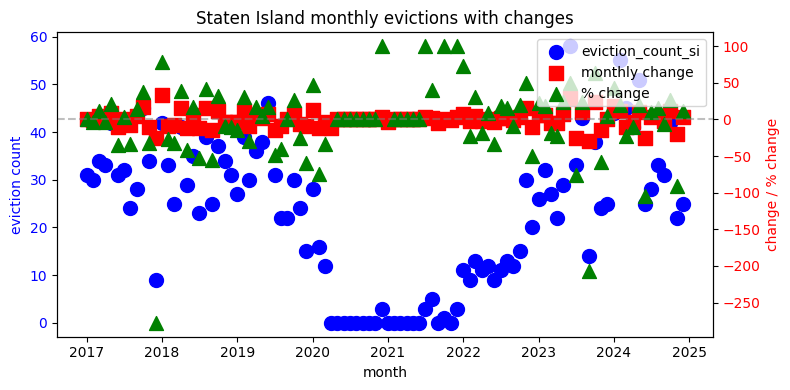

In [346]:
fig, ax1 = plt.subplots(figsize= (8, 4))

ax1.scatter(si_df['month'], si_df['eviction_count_si'], color='blue', label='eviction_count_si', s=100)
ax1.set_xlabel('month')
ax1.set_ylabel('eviction count', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

ax2 = ax1.twinx()
ax2.scatter(si_df['month'], si_df['monthly_change'], color='red', marker='s', label='monthly change', s=100)
ax2.scatter(si_df['month'], si_df['monthly_change_pct'], color='green', marker='^', label='% change', s=100)
ax2.set_ylabel('change / % change', color='red')
ax2.tick_params(axis='y', labelcolor='red')

ax2.axhline(0, color='gray', linestyle='--', alpha=0.5)

plt.title('Staten Island monthly evictions with changes')
fig.legend(loc='upper right', bbox_to_anchor=(1,1), bbox_transform=ax1.transAxes)

plt.xticks(rotation=45)

plt.tight_layout()
plt.show()
# will probably need to use the data to vis in excel

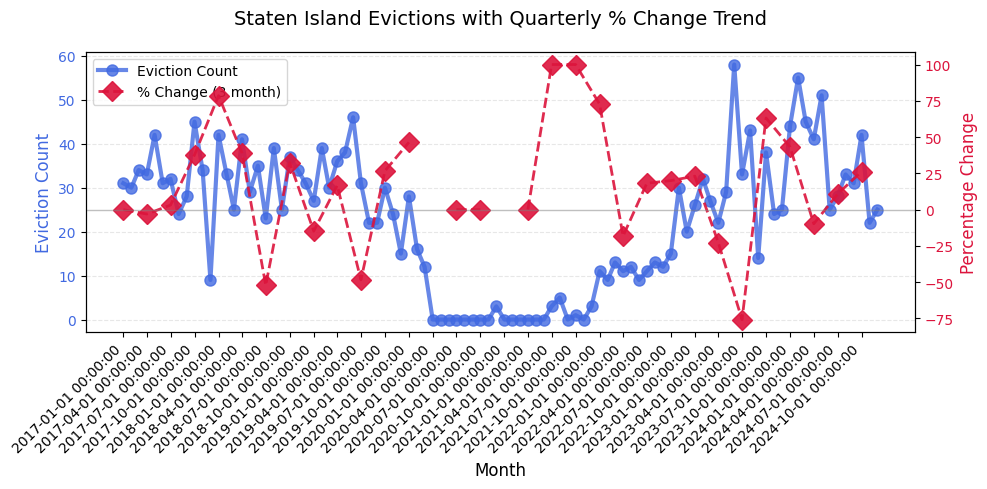

In [347]:
fig, ax1 = plt.subplots(figsize=(10, 5))
line1 = ax1.plot(si_df['month'], si_df['eviction_count_si'],
                color='royalblue', marker='o', linestyle='-',
                linewidth=3, markersize=8, alpha=0.8,
                label='Eviction Count')

ax1.set_xlabel('Month', fontsize=12)
ax1.set_ylabel('Eviction Count', color='royalblue', fontsize=12)
ax1.tick_params(axis='y', labelcolor='royalblue')

ax2 = ax1.twinx()

pct_df = si_df.iloc[::3]

line2 = ax2.plot(pct_df['month'], pct_df['monthly_change_pct'],
                color='crimson', marker='D', linestyle='--',
                linewidth=2, markersize=10, alpha=0.9,
                label='% Change (3 month)')

ax2.set_ylabel('Percentage Change', color='crimson', fontsize=12)
ax2.tick_params(axis='y', labelcolor='crimson')

ax2.axhline(0, color='gray', linestyle='-', alpha=0.5, linewidth=1)
ax1.grid(axis='y', linestyle='--', alpha=0.3)

ax1.set_xticks(pct_df['month'])
ax1.set_xticklabels(pct_df['month'], rotation=45, ha='right')

lines = line1 + line2
labels = [l.get_label() for l in lines]
ax1.legend(lines, labels, loc='upper left', fontsize=10)

plt.title('Staten Island Evictions with Quarterly % Change Trend',
          fontsize=14, pad=20)
plt.tight_layout()
plt.show()
# at first glance, evictions go down every summer, around July 1st

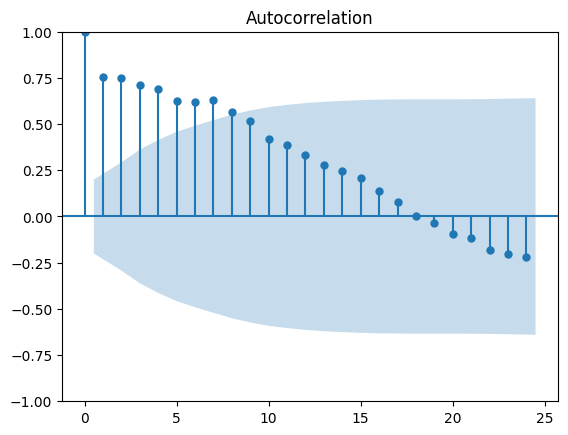

In [348]:
plot_acf(si_df['eviction_count_si'], lags=24, alpha=0.05)
plt.show()

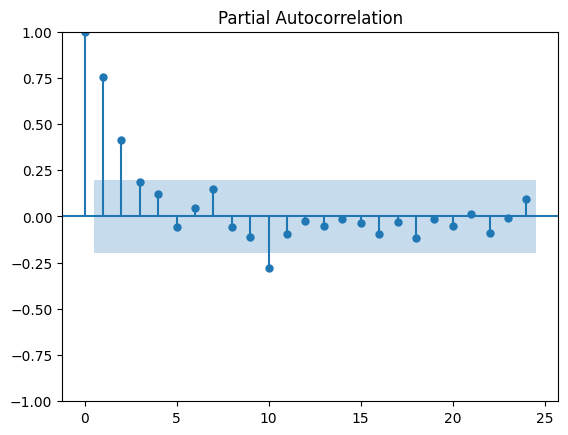

In [349]:
plot_pacf(si_df['eviction_count_si'], lags=24, alpha=0.05)
plt.show()

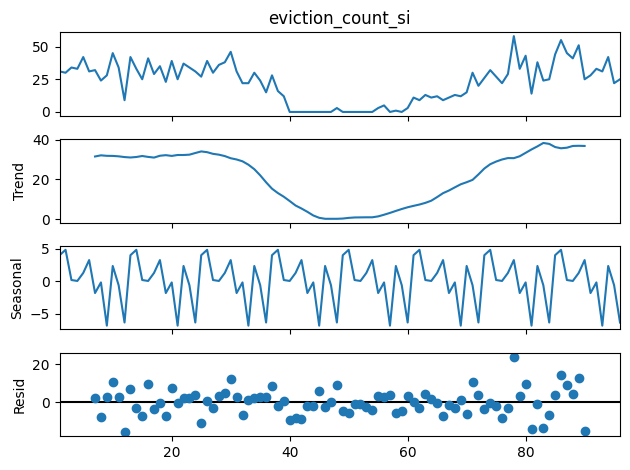

In [350]:
decomposition = seasonal_decompose(si_df['eviction_count_si'], model='additive', period=12)
# decomposition.plot()
_ = decomposition.plot()
# nonlinear trend
# low volatility (0–50)
# smallest eviction counts among boroughs
# flat periods: possible long-term stability, unlike Bronx’s spikes
# amplitude ~30, smallest of all
# peaks: likely align with minor summer lease cycles
# lows: winter dips (minimal activity)
# tight spread of residual: cleanest fit of all boroughs, almost no noise
# no seasonal ar, no semi-annual inversion

# **All Boroughs**

In [362]:
from functools import reduce
boroughs = [
    (man_df, '_man'),
    (bk_df, '_bk'),
    (queens_df, '_queens'),
    (br_df, '_br'),
    (si_df, '_si')
]

In [ ]:
combined_df = reduce(
    lambda left, right: pd.merge(
        left,
        right[0],
        on='month',
        how='outer',
        suffixes=('', right[1])
    ),
    boroughs[1:],
    boroughs[0][0]
)

In [363]:
combined_df

,month,eviction_count_man,monthly_change,monthly_change_pct,deseasonalized,eviction_count_bk,monthly_change_bk,deseasonalized_bk,monthly_change_pct_bk,eviction_count_queens,monthly_change_queens,deseasonalized_queens,monthly_change_pct_queens,eviction_count_br,monthly_change_br,deseasonalized_br,monthly_change_pct_br,eviction_count_si,monthly_change_si,deseasonalized_si,monthly_change_pct_si
0,2017-01-01,254,0.0,0.000000,250.011409,460,0.0,0.0,0.000000,225,0.0,0.0,0.000000,627,0.0,0.0,0.000000,31,0.0,0.0,0.000000
1,2017-02-01,183,-71.0,-38.797814,178.184028,343,-117.0,0.0,-34.110787,166,-59.0,0.0,-35.542169,451,-176.0,0.0,-39.024390,30,-1.0,0.0,-3.333333
2,2017-03-01,215,32.0,14.883721,214.826885,412,69.0,0.0,16.747573,209,43.0,0.0,20.574163,536,85.0,0.0,15.858209,34,4.0,0.0,11.764706
3,2017-04-01,211,-4.0,-1.895735,210.969742,395,-17.0,0.0,-4.303797,186,-23.0,0.0,-12.365591,486,-50.0,0.0,-10.288066,33,-1.0,0.0,-3.030303
4,2017-05-01,217,6.0,2.764977,215.737599,386,-9.0,0.0,-2.331606,210,24.0,0.0,11.428571,610,124.0,0.0,20.327869,42,9.0,0.0,21.428571
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,2024-08-01,202,32.0,15.841584,202.195933,322,10.0,42.0,3.105590,168,-63.0,42.0,-37.500000,399,40.0,-25.0,10.025063,33,5.0,-10.0,15.151515
92,2024-09-01,175,-27.0,-15.428571,181.838790,262,-60.0,59.0,-22.900763,141,-27.0,38.0,-19.148936,467,68.0,67.0,14.561028,31,-2.0,17.0,-6.451613
93,2024-10-01,291,116.0,39.862543,288.666171,251,-11.0,-22.0,-4.382470,188,47.0,97.0,25.000000,464,-3.0,-1.0,-0.646552,42,11.0,4.0,26.190476
94,2024-11-01,168,-123.0,-73.214286,168.624504,230,-21.0,-52.0,-9.130435,127,-61.0,-5.0,-48.031496,379,-85.0,69.0,-22.427441,22,-20.0,-2.0,-90.909091


In [357]:
combined_df

,month,eviction_count_man,monthly_change_x,monthly_change_pct_x,deseasonalized_x,eviction_count_si,monthly_change_y,deseasonalized_y,monthly_change_pct_y
0,2017-01-01,254,0.0,0.000000,250.011409,31,0.0,0.0,0.000000
1,2017-02-01,183,-71.0,-38.797814,178.184028,30,-1.0,0.0,-3.333333
2,2017-03-01,215,32.0,14.883721,214.826885,34,4.0,0.0,11.764706
3,2017-04-01,211,-4.0,-1.895735,210.969742,33,-1.0,0.0,-3.030303
4,2017-05-01,217,6.0,2.764977,215.737599,42,9.0,0.0,21.428571
...,...,...,...,...,...,...,...,...,...
91,2024-08-01,202,32.0,15.841584,202.195933,33,5.0,-10.0,15.151515
92,2024-09-01,175,-27.0,-15.428571,181.838790,31,-2.0,17.0,-6.451613
93,2024-10-01,291,116.0,39.862543,288.666171,42,11.0,4.0,26.190476
94,2024-11-01,168,-123.0,-73.214286,168.624504,22,-20.0,-2.0,-90.909091


In [364]:
eviction_cols = [
    'eviction_count_man',
    'eviction_count_bk',
    'eviction_count_queens',
    'eviction_count_br',
    'eviction_count_si'
]

combined_df['total_evictions'] = combined_df[eviction_cols].sum(axis=1, skipna=True)

In [365]:
combined_df

,month,eviction_count_man,monthly_change,monthly_change_pct,deseasonalized,eviction_count_bk,monthly_change_bk,deseasonalized_bk,monthly_change_pct_bk,eviction_count_queens,monthly_change_queens,deseasonalized_queens,monthly_change_pct_queens,eviction_count_br,monthly_change_br,deseasonalized_br,monthly_change_pct_br,eviction_count_si,monthly_change_si,deseasonalized_si,monthly_change_pct_si,total_evictions
0,2017-01-01,254,0.0,0.000000,250.011409,460,0.0,0.0,0.000000,225,0.0,0.0,0.000000,627,0.0,0.0,0.000000,31,0.0,0.0,0.000000,1597
1,2017-02-01,183,-71.0,-38.797814,178.184028,343,-117.0,0.0,-34.110787,166,-59.0,0.0,-35.542169,451,-176.0,0.0,-39.024390,30,-1.0,0.0,-3.333333,1173
2,2017-03-01,215,32.0,14.883721,214.826885,412,69.0,0.0,16.747573,209,43.0,0.0,20.574163,536,85.0,0.0,15.858209,34,4.0,0.0,11.764706,1406
3,2017-04-01,211,-4.0,-1.895735,210.969742,395,-17.0,0.0,-4.303797,186,-23.0,0.0,-12.365591,486,-50.0,0.0,-10.288066,33,-1.0,0.0,-3.030303,1311
4,2017-05-01,217,6.0,2.764977,215.737599,386,-9.0,0.0,-2.331606,210,24.0,0.0,11.428571,610,124.0,0.0,20.327869,42,9.0,0.0,21.428571,1465
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,2024-08-01,202,32.0,15.841584,202.195933,322,10.0,42.0,3.105590,168,-63.0,42.0,-37.500000,399,40.0,-25.0,10.025063,33,5.0,-10.0,15.151515,1124
92,2024-09-01,175,-27.0,-15.428571,181.838790,262,-60.0,59.0,-22.900763,141,-27.0,38.0,-19.148936,467,68.0,67.0,14.561028,31,-2.0,17.0,-6.451613,1076
93,2024-10-01,291,116.0,39.862543,288.666171,251,-11.0,-22.0,-4.382470,188,47.0,97.0,25.000000,464,-3.0,-1.0,-0.646552,42,11.0,4.0,26.190476,1236
94,2024-11-01,168,-123.0,-73.214286,168.624504,230,-21.0,-52.0,-9.130435,127,-61.0,-5.0,-48.031496,379,-85.0,69.0,-22.427441,22,-20.0,-2.0,-90.909091,926


# **combined df**

In [366]:
combined_df

,month,eviction_count_man,monthly_change,monthly_change_pct,deseasonalized,eviction_count_bk,monthly_change_bk,deseasonalized_bk,monthly_change_pct_bk,eviction_count_queens,monthly_change_queens,deseasonalized_queens,monthly_change_pct_queens,eviction_count_br,monthly_change_br,deseasonalized_br,monthly_change_pct_br,eviction_count_si,monthly_change_si,deseasonalized_si,monthly_change_pct_si,total_evictions
0,2017-01-01,254,0.0,0.000000,250.011409,460,0.0,0.0,0.000000,225,0.0,0.0,0.000000,627,0.0,0.0,0.000000,31,0.0,0.0,0.000000,1597
1,2017-02-01,183,-71.0,-38.797814,178.184028,343,-117.0,0.0,-34.110787,166,-59.0,0.0,-35.542169,451,-176.0,0.0,-39.024390,30,-1.0,0.0,-3.333333,1173
2,2017-03-01,215,32.0,14.883721,214.826885,412,69.0,0.0,16.747573,209,43.0,0.0,20.574163,536,85.0,0.0,15.858209,34,4.0,0.0,11.764706,1406
3,2017-04-01,211,-4.0,-1.895735,210.969742,395,-17.0,0.0,-4.303797,186,-23.0,0.0,-12.365591,486,-50.0,0.0,-10.288066,33,-1.0,0.0,-3.030303,1311
4,2017-05-01,217,6.0,2.764977,215.737599,386,-9.0,0.0,-2.331606,210,24.0,0.0,11.428571,610,124.0,0.0,20.327869,42,9.0,0.0,21.428571,1465
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,2024-08-01,202,32.0,15.841584,202.195933,322,10.0,42.0,3.105590,168,-63.0,42.0,-37.500000,399,40.0,-25.0,10.025063,33,5.0,-10.0,15.151515,1124
92,2024-09-01,175,-27.0,-15.428571,181.838790,262,-60.0,59.0,-22.900763,141,-27.0,38.0,-19.148936,467,68.0,67.0,14.561028,31,-2.0,17.0,-6.451613,1076
93,2024-10-01,291,116.0,39.862543,288.666171,251,-11.0,-22.0,-4.382470,188,47.0,97.0,25.000000,464,-3.0,-1.0,-0.646552,42,11.0,4.0,26.190476,1236
94,2024-11-01,168,-123.0,-73.214286,168.624504,230,-21.0,-52.0,-9.130435,127,-61.0,-5.0,-48.031496,379,-85.0,69.0,-22.427441,22,-20.0,-2.0,-90.909091,926


In [372]:
combined_df['month'] = pd.to_datetime(combined_df['month'])
combined_df['total_evictions'] = combined_df['total_evictions'].astype(int)

In [373]:
combined_df['monthly_change'] = combined_df['total_evictions'].diff()

In [374]:
combined_df

,month,eviction_count_man,monthly_change,monthly_change_pct,deseasonalized,eviction_count_bk,monthly_change_bk,deseasonalized_bk,monthly_change_pct_bk,eviction_count_queens,monthly_change_queens,deseasonalized_queens,monthly_change_pct_queens,eviction_count_br,monthly_change_br,deseasonalized_br,monthly_change_pct_br,eviction_count_si,monthly_change_si,deseasonalized_si,monthly_change_pct_si,total_evictions,eviction_count_combined
0,2017-01-01,254,NaN,0.000000,250.011409,460,0.0,0.0,0.000000,225,0.0,0.0,0.000000,627,0.0,0.0,0.000000,31,0.0,0.0,0.000000,1597,1597
1,2017-02-01,183,-424.0,-38.797814,178.184028,343,-117.0,0.0,-34.110787,166,-59.0,0.0,-35.542169,451,-176.0,0.0,-39.024390,30,-1.0,0.0,-3.333333,1173,1173
2,2017-03-01,215,233.0,14.883721,214.826885,412,69.0,0.0,16.747573,209,43.0,0.0,20.574163,536,85.0,0.0,15.858209,34,4.0,0.0,11.764706,1406,1406
3,2017-04-01,211,-95.0,-1.895735,210.969742,395,-17.0,0.0,-4.303797,186,-23.0,0.0,-12.365591,486,-50.0,0.0,-10.288066,33,-1.0,0.0,-3.030303,1311,1311
4,2017-05-01,217,154.0,2.764977,215.737599,386,-9.0,0.0,-2.331606,210,24.0,0.0,11.428571,610,124.0,0.0,20.327869,42,9.0,0.0,21.428571,1465,1465
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,2024-08-01,202,24.0,15.841584,202.195933,322,10.0,42.0,3.105590,168,-63.0,42.0,-37.500000,399,40.0,-25.0,10.025063,33,5.0,-10.0,15.151515,1124,1124
92,2024-09-01,175,-48.0,-15.428571,181.838790,262,-60.0,59.0,-22.900763,141,-27.0,38.0,-19.148936,467,68.0,67.0,14.561028,31,-2.0,17.0,-6.451613,1076,1076
93,2024-10-01,291,160.0,39.862543,288.666171,251,-11.0,-22.0,-4.382470,188,47.0,97.0,25.000000,464,-3.0,-1.0,-0.646552,42,11.0,4.0,26.190476,1236,1236
94,2024-11-01,168,-310.0,-73.214286,168.624504,230,-21.0,-52.0,-9.130435,127,-61.0,-5.0,-48.031496,379,-85.0,69.0,-22.427441,22,-20.0,-2.0,-90.909091,926,926


In [375]:
combined_df['monthly_change'] = combined_df['monthly_change'].fillna(0)

In [376]:
combined_df['deseasonalized'] = combined_df['total_evictions'].diff(12)

In [377]:
combined_df['monthly_change_pct'] = combined_df['monthly_change'] / combined_df['total_evictions']*100
combined_df.fillna(0, inplace=True)
combined_df

,month,eviction_count_man,monthly_change,monthly_change_pct,deseasonalized,eviction_count_bk,monthly_change_bk,deseasonalized_bk,monthly_change_pct_bk,eviction_count_queens,monthly_change_queens,deseasonalized_queens,monthly_change_pct_queens,eviction_count_br,monthly_change_br,deseasonalized_br,monthly_change_pct_br,eviction_count_si,monthly_change_si,deseasonalized_si,monthly_change_pct_si,total_evictions,eviction_count_combined
0,2017-01-01,254,0.0,0.000000,0.0,460,0.0,0.0,0.000000,225,0.0,0.0,0.000000,627,0.0,0.0,0.000000,31,0.0,0.0,0.000000,1597,1597
1,2017-02-01,183,-424.0,-36.146633,0.0,343,-117.0,0.0,-34.110787,166,-59.0,0.0,-35.542169,451,-176.0,0.0,-39.024390,30,-1.0,0.0,-3.333333,1173,1173
2,2017-03-01,215,233.0,16.571835,0.0,412,69.0,0.0,16.747573,209,43.0,0.0,20.574163,536,85.0,0.0,15.858209,34,4.0,0.0,11.764706,1406,1406
3,2017-04-01,211,-95.0,-7.246377,0.0,395,-17.0,0.0,-4.303797,186,-23.0,0.0,-12.365591,486,-50.0,0.0,-10.288066,33,-1.0,0.0,-3.030303,1311,1311
4,2017-05-01,217,154.0,10.511945,0.0,386,-9.0,0.0,-2.331606,210,24.0,0.0,11.428571,610,124.0,0.0,20.327869,42,9.0,0.0,21.428571,1465,1465
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,2024-08-01,202,24.0,2.135231,40.0,322,10.0,42.0,3.105590,168,-63.0,42.0,-37.500000,399,40.0,-25.0,10.025063,33,5.0,-10.0,15.151515,1124,1124
92,2024-09-01,175,-48.0,-4.460967,172.0,262,-60.0,59.0,-22.900763,141,-27.0,38.0,-19.148936,467,68.0,67.0,14.561028,31,-2.0,17.0,-6.451613,1076,1076
93,2024-10-01,291,160.0,12.944984,168.0,251,-11.0,-22.0,-4.382470,188,47.0,97.0,25.000000,464,-3.0,-1.0,-0.646552,42,11.0,4.0,26.190476,1236,1236
94,2024-11-01,168,-310.0,-33.477322,-16.0,230,-21.0,-52.0,-9.130435,127,-61.0,-5.0,-48.031496,379,-85.0,69.0,-22.427441,22,-20.0,-2.0,-90.909091,926,926


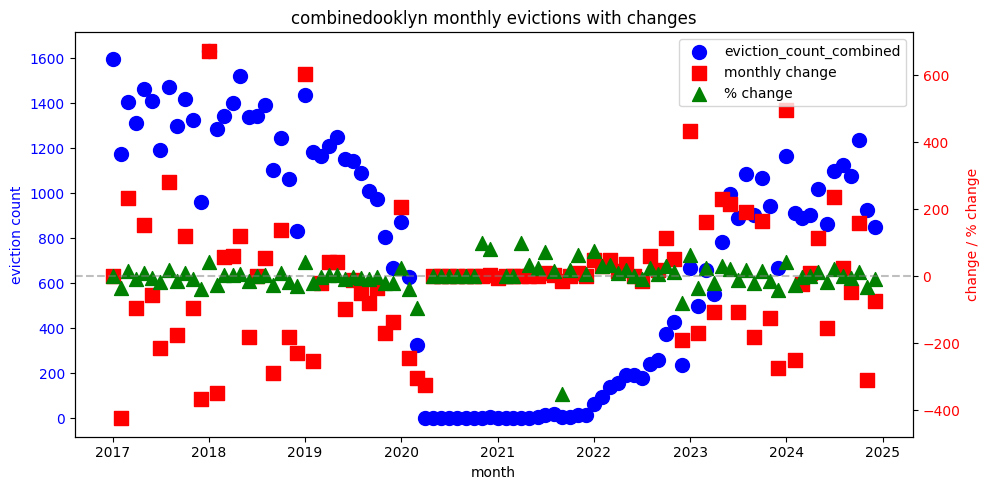

In [380]:
fig, ax1 = plt.subplots(figsize=(10, 5))

ax1.scatter(combined_df['month'], combined_df['total_evictions'], color='blue', label='eviction_count_combined', s=100)
ax1.set_xlabel('month')
ax1.set_ylabel('eviction count', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

ax2 = ax1.twinx()
ax2.scatter(combined_df['month'], combined_df['monthly_change'], color='red', marker='s', label='monthly change', s=100)
ax2.scatter(combined_df['month'], combined_df['monthly_change_pct'], color='green', marker='^', label='% change', s=100)
ax2.set_ylabel('change / % change', color='red')
ax2.tick_params(axis='y', labelcolor='red')

ax2.axhline(0, color='gray', linestyle='--', alpha=0.5)

plt.title('combinedooklyn monthly evictions with changes')
fig.legend(loc='upper right', bbox_to_anchor=(1,1), bbox_transform=ax1.transAxes)

plt.xticks(rotation=45)

plt.tight_layout()
plt.show()
# will probably need to use the data to vis in excel

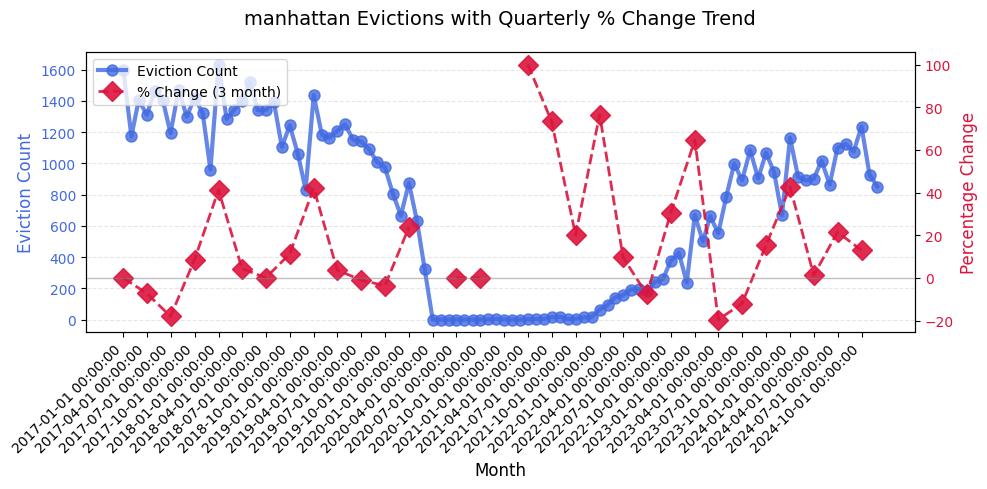

In [388]:
fig, ax1 = plt.subplots(figsize=(10, 5))
line1 = ax1.plot(combined_df['month'], combined_df['total_evictions'],
                color='royalblue', marker='o', linestyle='-',
                linewidth=3, markersize=8, alpha=0.8,
                label='Eviction Count')

ax1.set_xlabel('Month', fontsize=12)
ax1.set_ylabel('Eviction Count', color='royalblue', fontsize=12)
ax1.tick_params(axis='y', labelcolor='royalblue')

ax2 = ax1.twinx()

pct_df = combined_df.iloc[::3]

line2 = ax2.plot(pct_df['month'], pct_df['monthly_change_pct'],
                color='crimson', marker='D', linestyle='--',
                linewidth=2, markersize=10, alpha=0.9,
                label='% Change (3 month)')

ax2.set_ylabel('Percentage Change', color='crimson', fontsize=12)
ax2.tick_params(axis='y', labelcolor='crimson')

ax2.axhline(0, color='gray', linestyle='-', alpha=0.5, linewidth=1)
ax1.grid(axis='y', linestyle='--', alpha=0.3)

ax1.set_xticks(pct_df['month'])
ax1.set_xticklabels(pct_df['month'], rotation=45, ha='right')

lines = line1 + line2
labels = [l.get_label() for l in lines]
ax1.legend(lines, labels, loc='upper left', fontsize=10)

plt.title('manhattan Evictions with Quarterly % Change Trend',
          fontsize=14, pad=20)
plt.tight_layout()
plt.show()
# at first glance, evictions go down every summer, around July 1st

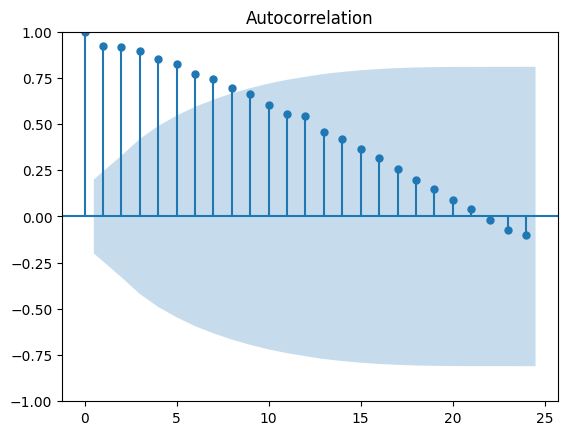

In [390]:
plot_acf(combined_df['total_evictions'], lags=24, alpha=0.05)
plt.show()

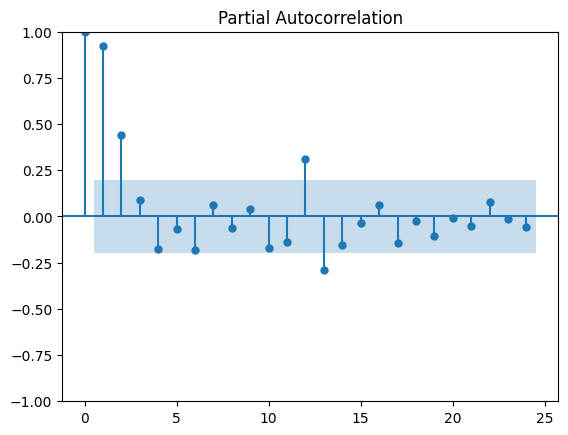

In [391]:
plot_pacf(combined_df['total_evictions'], lags=24, alpha=0.05)
plt.show()

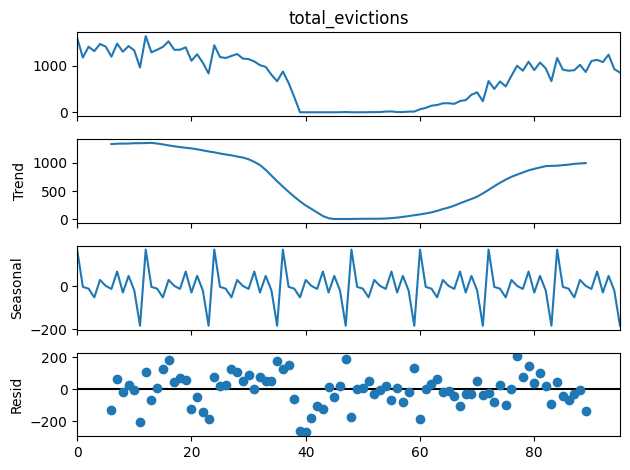

In [392]:
decompocombinedtion = seasonal_decompose(combined_df['total_evictions'], model='additive', period=12)
# decompocombinedtion.plot()
_ = decompocombinedtion.plot()

# extreme volatility (0–1000 range)
# sharp spikes/drops suggest citywide policy shocks, such as the pandemic moratoriums ending
# negative values in residuals: likely from over-differencing
# big amplitude (+/-500): far stronger than individual boroughs, indicating synergistic seasonality when combined.
# peaks: likely summer, when all boroughs’ seasonal highs align
# low: winter (possibly due to courts closed + holidays).
# residuals: large noise (+/-200): worse than any single borough, becuase borough-specific noise compounds in aggregation.
# acf: lag 12 spike ( about 0.7), reinforces citywide annual seasonality.